# INDIAN STARTUP ECOSYSTEM

## Description; 

This is an investigation into the Indian startup ecosystem. In this project are going to analyze funding received by Startups in India from 2018 to 2021 and we will determine if the Indian Startup is worth venturing into.

# Business Understanding

### Objective
The objective of this investigation is to analyze the Indian startup ecosystem with a focus on understanding the funding dynamics between 2018 and 2021. Specifically, the goal is to determine if startups with multiple founders raise more money compared to those with a single founder. This analysis will also explore various factors such as the average funding amount across different cities, the distribution of investments across sectors, and the funding amounts at different stages of startup growth.

### Hypothesis Statements
#### Null Hypothesis (H0):
Startups with multiple founders tend to raise significantly more money than those with a single founder.

#### Hypothesis (H1):
Startups with multiple founders do not  raise significantly more money than those with a single founder.


### Analytical questions; 

Question 1: What is the average funding amount for startups based in different cities? 

 

Question 2: How does the total investment compare across different sectors? 

Which sectors have received the most and least funding? 

 

Question 3: What is the distribution of investment amounts across different stages of funding? 

How does the funding amount differ between Seed, Pre-series, Series A, Series B, etc.? 

 

Question 4: Is there a significant difference in the amount of funding received by companies with single founders versus multiple founders? 

What is the average funding for single-founder startups compared to multi-founder startups? 

 

Question 5: How does the age of the company (years since founding) relate to the stage of funding? 

Are newer companies more likely to be in the Seed or Pre-series stage? 

 

Question 6: What is the distribution of funding amounts within specific sectors? 

For example, within HealthTech or FinTech, how are the investments distributed? 

 

Question 7: What are the common investors in different sectors and stages? 

Are there any investors that frequently appear across multiple companies or sectors? 

 

Question 8: How many companies are in each stage of funding? 

What is the proportion of companies in Seed, Pre-series, Series A, Series B, etc.? 

 

Question 9: How does the number of founders correlate with the stage of funding? 

Are there more single-founder companies in the early stages of funding compared to later stages? 

## Data Understanding

In [20]:
#Importing neccessary libraries
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings('ignore')



In [21]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [22]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


In [23]:
connection = pyodbc.connect(connection_string)


In [24]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query = '''SELECT * FROM LP1_startup_funding2020'''

df20 = pd.read_sql(query, connection)
df20.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [25]:
df20['Amount'] = df20['Amount'].astype(str)
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         1055 non-null   object 
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(1), object(9)
memory usage: 82.6+ KB


In [26]:
query = '''SELECT * FROM LP1_startup_funding2021'''

df21 = pd.read_sql(query, connection)
df21.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [27]:
# Importing data from other souces
df18 = pd.read_csv('startup_funding2018.csv')
df19 = pd.read_csv('startup_funding2019..csv')

# Column Descriptions
Company_Brand:

Description: The name of the startup or company that received funding.
Type: String
Example: "Flipkart", "Ola", "Zomato"
Sector:

Description: The industry or sector in which the startup operates.
Type: String
Example: "E-commerce", "Transportation", "Food Delivery"
Stage:

Description: The stage of funding the startup is in at the time of receiving the investment. This could range from Seed stage to various series stages (e.g., Series A, Series B, etc.).
Type: String
Example: "Seed", "Series A", "Series B"
Amount:

Description: The amount of funding received by the startup. The amounts can be in different currencies (e.g., dollars or rupees) and need to be standardized.
Type: Numeric (after cleaning)
Example: 6300000, 150000000, 28000000
HeadQuarter:

Description: The city or location where the startup's headquarters are based.
Type: String
Example: "Bangalore", "Mumbai", "Delhi"
What_it_does:

Description: A brief description of the startup's main product or service offering.
Type: String
Example: "Online marketplace", "Ride-hailing service", "Food delivery service"
fundyear:

Description: The year in which the funding was received.
Type: Integer
Example: 2018, 2019, 2020
Founded:

Description: The year the startup was founded.
Type: Integer
Example: 2010, 2015, 2017
Founders:

Description: The names of the founders of the startup. This could be a single founder or multiple founders.
Type: String (potentially a list if multiple founders)
Example: "Sachin Bansal, Binny Bansal", "Bhavish Aggarwal", "Deepinder Goyal, Pankaj Chaddah"
Investor in:

Description: The names of the investors or investment firms that have invested in the startup.
Type: String (potentially a list if multiple investors)
Example: "Tiger Global, SoftBank", "Sequoia Capital", "Accel Partners"

## Data Cleaning
##### 2018 Amount column



In [28]:
#2018 Amount cleaning
df18.head()
df18['Amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [29]:
# Define a function to determine the currency
def determine_currency(amount):
    if '₹' in amount:
        return 'rupee'
    else:
        return 'dollar'

# Add a new column 'currency' to the DataFrame
df18['currency'] = df18['Amount'].apply(determine_currency)

# Print the first 5 rows of the DataFrame
df18.head()

df18['Amount']=df18['Amount'].str.replace('₹','')
df18['Amount']=df18['Amount'].str.replace(',','')
df18['Amount'] = pd.to_numeric(df18['Amount'], errors='coerce')

# Filter the DataFrame to include only rows with 'Rupees'
rupees_df = df18[df18['currency'] == 'rupee']

# Example modification: converting amounts to dollars in rupees_df
conversion_rate = 70  # 70 Rupees to 1 Dollar
rupees_df['Amount'] = round((rupees_df['Amount'] / conversion_rate),2)


# Display the new DataFrame
rupees_df.head()

# Remove the original rows with 'Rupees' from the original DataFrame
df18 = df18[df18['currency'] != 'rupee']

# Concatenate the modified rupees_df back to the original DataFrame
updated_df = pd.concat([df18, rupees_df], ignore_index=True)

# Display the updated DataFrame
updated_df


,Company Name,Industry,Round/Series,Amount,Location,About Company,currency
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",dollar
1,PayMe India,"Financial Services, FinTech",Angel,2000000.00,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,dollar
2,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,dollar
3,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000.00,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...,dollar
4,Freightwalla,"Information Services, Information Technology",Seed,NaN,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...,dollar
...,...,...,...,...,...,...,...
521,Nykaa,"Beauty, Fashion, Wellness",Secondary Market,16142857.14,"Mumbai, Maharashtra, India",Nykaa.com is a premier online beauty and welln...,rupee
522,Chaayos,"Food and Beverage, Restaurants, Tea",Series B,11571428.57,"New Delhi, Delhi, India",Chaayos was born in November 2012 out of this ...,rupee
523,LT Foods,"Food and Beverage, Food Processing, Manufacturing",Post-IPO Equity,20000000.00,"New Delhi, Delhi, India",LT Foods believe that nature will continue to ...,rupee
524,Multibashi,"E-Learning, Internet",Seed,142857.14,"Bengaluru, Karnataka, India",Free language learning platform.,rupee


In [30]:
df18 = updated_df

df18 = df18.drop(['currency'],axis = 1)

df18

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,PayMe India,"Financial Services, FinTech",Angel,2000000.00,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
2,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
3,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000.00,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...
4,Freightwalla,"Information Services, Information Technology",Seed,NaN,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...
...,...,...,...,...,...,...
521,Nykaa,"Beauty, Fashion, Wellness",Secondary Market,16142857.14,"Mumbai, Maharashtra, India",Nykaa.com is a premier online beauty and welln...
522,Chaayos,"Food and Beverage, Restaurants, Tea",Series B,11571428.57,"New Delhi, Delhi, India",Chaayos was born in November 2012 out of this ...
523,LT Foods,"Food and Beverage, Food Processing, Manufacturing",Post-IPO Equity,20000000.00,"New Delhi, Delhi, India",LT Foods believe that nature will continue to ...
524,Multibashi,"E-Learning, Internet",Seed,142857.14,"Bengaluru, Karnataka, India",Free language learning platform.


In [31]:
# Renaming columns before concatenating datasets
df18['fundyear'] = 2018
df18.columns = ['Company_Brand','Sector','Stage', 'Amount', 'HeadQuarter', 'What_it_does','fundyear']     
df18.info()
df18.describe()
df18.isnull().sum()

df18.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  526 non-null    object 
 1   Sector         526 non-null    object 
 2   Stage          526 non-null    object 
 3   Amount         319 non-null    float64
 4   HeadQuarter    526 non-null    object 
 5   What_it_does   526 non-null    object 
 6   fundyear       526 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 28.9+ KB


,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,fundyear
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,PayMe India,"Financial Services, FinTech",Angel,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
2,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018
3,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000.0,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...,2018
4,Freightwalla,"Information Services, Information Technology",Seed,NaN,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...,2018


In [32]:
#making changes to dataframes before concatenating 
df19['fundyear'] = 2019
df20['fundyear'] = 2020
df21['fundyear'] = 2021

data = pd.concat([df18,df19, df20, df21], ignore_index=True)
data.drop('column10', axis=1, inplace=True)
data.tail()



,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,fundyear,Founded,Founders,Investor
2874,Gigforce,Staffing & Recruiting,Pre-series A,$3000000,Gurugram,A gig/on-demand staffing company.,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
2875,Vahdam,Food & Beverages,Series D,$20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2021,2015.0,Bala Sarda,IIFL AMC
2876,Leap Finance,Financial Services,Series C,$55000000,Bangalore,International education loans for high potenti...,2021,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures
2877,CollegeDekho,EdTech,Series B,$26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital"
2878,WeRize,Financial Services,Series A,$8000000,Bangalore,India’s first socially distributed full stack ...,2021,2019.0,"Vishal Chopra, Himanshu Gupta","3one4 Capital, Kalaari Capital"


In [33]:
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Sector         2861 non-null   object 
 2   Stage          1941 non-null   object 
 3   Amount         2669 non-null   object 
 4   HeadQuarter    2765 non-null   object 
 5   What_it_does   2879 non-null   object 
 6   fundyear       2879 non-null   int64  
 7   Founded        2110 non-null   float64
 8   Founders       2334 non-null   object 
 9   Investor       2253 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 225.1+ KB
None
          fundyear      Founded
count  2879.000000  2110.000000
mean   2020.023619  2016.079621
std       1.086974     4.368006
min    2018.000000  1963.000000
25%    2020.000000  2015.000000
50%    2020.000000  2017.000000
75%    2021.000000  2019.000000
max    2021.000000  2021.000000
Company_

#### Cleaning the concatenated dataset


In [34]:
# Cleaning amount column

#data['Amount'].unique()
data['Amount'] = data['Amount'].astype(str)
data['Amount'] = data['Amount'].str.replace('₹','')
data['Amount'] = data['Amount'].str.replace(',','')
data['Amount'] = data['Amount'].str.replace('$','')
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

data.head()

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,fundyear,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,PayMe India,"Financial Services, FinTech",Angel,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
2,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN
3,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000.0,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...,2018,NaN,NaN,NaN
4,Freightwalla,"Information Services, Information Technology",Seed,NaN,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...,2018,NaN,NaN,NaN


In [35]:
# cleaning sector column

data['Sector'].unique()
data['Sector'] = data['Sector'].astype(str)

def clean_sector(sector):
    # Split the sector into individual items, trim whitespaces, and convert to lower case
    sectors = [item.strip().lower() for item in sector.split(',')]
    
    # Standardize similar terms
    standardization_dict = {
        'fintech': 'financial technology',
        'saas': 'software as a service',
        'paas': 'platform as a service'
    }
    
    standardized_sectors = [standardization_dict.get(sec, sec) for sec in sectors]
    
    # Remove duplicates
    unique_sectors = list(set(standardized_sectors))
    
    # Capitalize each word for consistency
    cleaned_sectors = ', '.join([sec.title() for sec in unique_sectors])
    
    return cleaned_sectors

data['Sector'] = data['Sector'].apply(clean_sector)

categories = {
    'Technology': ['Artificial Intelligence', 'Internet', 'Technology', 'Information', 'Network', 
                   'Big Data', 'Machine Learning', 'Search Engines', 'Online Portals','Edtech','Insurtech','Cloud Infrastructure'
                   'Industrial Automation','Mobile Payments','Developer Platform','Developer Tools','E-','Cloud Computing','Cloud','tech',
                   'Tech','AI','Ai','Computer','Ev','Electronics','Software','IT','Apps','Robotics','crypto','B2B','Drone','Data','It','Saas','Internet',
                   'Ecommerce','Iot','Blockchain'],
    'Finance': ['Financial Services', 'Credit Cards', 'Banking', 'Investment', 'Insurance','Finance','Trading','Venture'],
    'Energy': ['Electric Vehicle', 'Battery Energy', 'Renewable Energy', 'Solar', 'Wind', 'Energy','Renewable','Renewables'],
    'Transportation': ['Transportation', 'Logistics', 'Automobile', 'Travel','Transport','Auto'],
    'Food & Beverage': ['Food and Beverage', 'Restaurant', 'Cafe', 'Catering','Food & Beverage','Food Delivery', 'Food','Beverages','Beverage'],
    'Health & Wellness': ['Health', 'Healthcare','Heathcare', 'Hospital', 'Personal Health','Wellness','Medical','fit','fitness','gym,','Fitness','Skincare',
                          'Pharmacy','Hyegeine','Sports','Veterinary','Mobility'],
    'Education': ['Education', 'School','Day Care'],
    'Fashion': ['Fashion','Fashion','Jewelry','Eyeglasses','Eye Wear','Apparel','Dating','Celebrity','Eyewear','D2C Fashion','Matrimony',
         'Textiles','D2C jewellery','Foootwear','Arts','Cosmetics'],
    'Media & Entertainment' : ['Media','Entertainment','Media','News','Video','Digital Media','FM','Publication','OTT','Social Network','Music',
        'Digital platform','Podcast','publishing','Blogging','Gaming','Games','Content','Creation'],
    'Selling & Marketing' : ['Marketing','Research','Market','Consulting','Retail','Goods','Producing','Consumer','Commerce'],
    'Real Estate': ['Real Estate','Building','Construction','Housing','Estate','Accomodation','Interior','Furniture'],
    'Services' : ['Services','Human Resources','Recruitment','Consulting','Legal','Job','Rental'],
    'Agric': ['Agric','Farming']
}

# Function to categorize sectors
def categorize_sector(sector):
    for category, keywords in categories.items():
        if any(keyword in sector for keyword in keywords):
            return category
    return 'Other'  # Default category if no keywords match

# Apply the function to the dataframe
data['category'] = data['Sector'].apply(categorize_sector)

data.sample(5)





,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,fundyear,Founded,Founders,Investor,category
1698,TrulyMadly,Dating,Pre-series A,2000000.00,New Delhi,Trulymadly is a dating platform that uses a ma...,2021,2013.0,"Hitesh Dhingra, Rahul Kumar, Sachin Bhatia","Gaurav Munjal, Snehil Khanor",Fashion
2560,Prodo,Business Supplies & Equipment,Pre-seed,300000.00,New Delhi,Prodo is an e-commerce platform that provides ...,2021,2021.0,"Sameen Husain, Abhiroop Srivastava","Titan Capital, LetsVenture",Other
404,Ultraviolette Automotive,"Automotive, Electric Vehicle, Energy Storage",Series A,857.14,"Bangalore, Karnataka, India",Ultraviolette is a startup working on electric...,2018,NaN,NaN,NaN,Energy
813,Finova Capital,Financial Technology,None,55000000.00,"Jaipur, Rajastan",Finova Capital is a non-banking financial comp...,2020,2016.0,"Mohit Sahney, Sunita Sahney","Sequoia Capital India, Faering Capital",Technology
2618,ANS Commerce,E-Commerce,Pre-series A,2200000.00,Gurugram,ANS Commerce is India’s #1 full-stack e-commer...,2021,2017.0,"Amit Monga, Nakul Singh, Vibhor Sahare, Sushan...","Gokul Rajaram, Venture Catalysts",Technology


In [36]:
data['Founders']


0                                 NaN
1                                 NaN
2                                 NaN
3                                 NaN
4                                 NaN
                    ...              
2874      Chirag Mittal, Anirudh Syal
2875                       Bala Sarda
2876       Arnav Kumar, Vaibhav Singh
2877                     Ruchir Arora
2878    Vishal Chopra, Himanshu Gupta
Name: Founders, Length: 2879, dtype: object

In [37]:
def count(founder):
    if pd.isna(founder) or founder == '':
        return 'unknown'
    elif ',' in founder:
        return 'multiple'
    else:
        return 'single'

data['founder_count'] = data['Founders'].apply(count)

data.sample(5)

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,fundyear,Founded,Founders,Investor,category,founder_count
1687,ORAI,It Startup,Pre-series A,400000.0,Bangalore,AI-Powered Robotic Virtual Assistant (RVA) for...,2021,2020.0,"Swapnil Jain, Sujit Das Biswas",Inflection Point Ventures,Technology,multiple
210,Inc42,"Publishing, News, Media And Entertainment",Seed,NaN,"New Delhi, Delhi, India",Inc42 is one of the leading tech media publica...,2018,NaN,NaN,NaN,Media & Entertainment,unknown
57,Propelld,"Financial Technology, Education, Financial Ser...",Seed,250000.0,"Bengaluru, Karnataka, India",Propelld is a student education financing plat...,2018,NaN,NaN,NaN,Technology,unknown
1598,Samosa Singh,Food,Series A,2700000.0,Bangalore,Offers hygienic Indian Snacks,2020,2016.0,"Shikhar Veer Singh, Nidhi Singh",She Capital,Food & Beverage,multiple
2753,Karbon Card,Financial Technology,Pre-series A,12000000.0,Bangalore,Empower Indian startups by creating the right ...,2021,2019.0,"Pei-fu Hsieh, Amit Jangir, Kartik Jain, Sunil ...","Ramp, Rainfall Ventures, Roka Works, Y Combinator",Technology,multiple


In [38]:
#Stage column

data['Stage'].unique()
data.isnull().sum()

Company_Brand      0
Sector             0
Stage            938
Amount           626
HeadQuarter      114
What_it_does       0
fundyear           0
Founded          769
Founders         545
Investor         626
category           0
founder_count      0
dtype: int64

In [39]:
def map_stage(stage):
    if not isinstance(stage, str):
        return 'Other'
    stage = stage.lower().strip()
    if 'pre-seed' in stage or 'pre seed' in stage or 'pre-seed round' in stage or 'pre-seed' in stage or 'early seed' in stage:
        return 'Pre-Seed'
    elif 'seed' in stage or 'angel' in stage or 'grant' in stage or 'seed funding' in stage or 'seed round' in stage or 'seed+' in stage:
        return 'Seed'
    elif 'series a' in stage or 'pre series a' in stage or 'pre-series a' in stage or 'series a-' in stage or 'series a+' in stage:
        return 'Series A'
    elif 'series b' in stage or 'series b+' in stage or 'series b2' in stage or 'series b3' in stage:
        return 'Series B'
    elif 'series c' in stage or 'series d' in stage or 'series e' in stage or 'series f' in stage or 'series g' in stage or 'series h' in stage or 'series i' in stage:
        return 'Series C+'
    elif 'debt' in stage or 'bridge' in stage:
        return 'Debt Financing'
    elif 'private equity' in stage or 'pe' in stage or 'secondary market' in stage or 'corporate round' in stage:
        return 'Private Equity'
    elif 'post-ipo' in stage:
        return 'Post-IPO'
    else:
        return 'Other'
    
data['Stage'] = data['Stage'].apply(map_stage)

data['Stage'].unique()

data['Stage'].value_counts()

Stage
Other             993
Seed              740
Series A          600
Series C+         222
Series B          156
Pre-Seed           74
Debt Financing     69
Private Equity     22
Post-IPO            3
Name: count, dtype: int64

In [61]:
data['HeadQuarter'].value_counts()

HeadQuarter
Bangalore      1043
Mumbai          474
Delhi           320
Gurugram        319
Chennai         106
               ... 
Palmwoods         1
Milano            1
Bangaldesh        1
Paris             1
Gandhinagar       1
Name: count, Length: 127, dtype: int64

In [59]:
# Headquater column
data['HeadQuarter'].astype(str)

def split(hq):
    if isinstance(hq, str):
        return hq.split(',')[0].strip()
    
data['HeadQuarter'] = data['HeadQuarter'].apply(split)

data['HeadQuarter'] = data['HeadQuarter'].str.replace('Bengaluru', 'Bangalore')
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Bangalore City', 'Bangalore')
data['HeadQuarter'] = data['HeadQuarter'].str.replace('New Delhi', 'Delhi')
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Gurgaon', 'Gurugram')
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Information Technology & Services', 'Bangalore')

data['HeadQuarter'].unique()

data['HeadQuarter'] = data['HeadQuarter'].fillna(data['HeadQuarter'].mode()[0])

data.isnull().sum()



Company_Brand      0
Sector             0
Stage              0
Amount             0
HeadQuarter        0
What_it_does       0
fundyear           0
Founded          769
Founders         545
Investor         626
category           0
founder_count      0
dtype: int64

In [41]:
data['Amount'] = data['Amount'].fillna(data['Amount'].median())

data['HeadQuarter'] = data['HeadQuarter'].fillna(data['HeadQuarter'].mode()[0])



### Exploratory data analysis

#### Univariate and bivariate data analysis

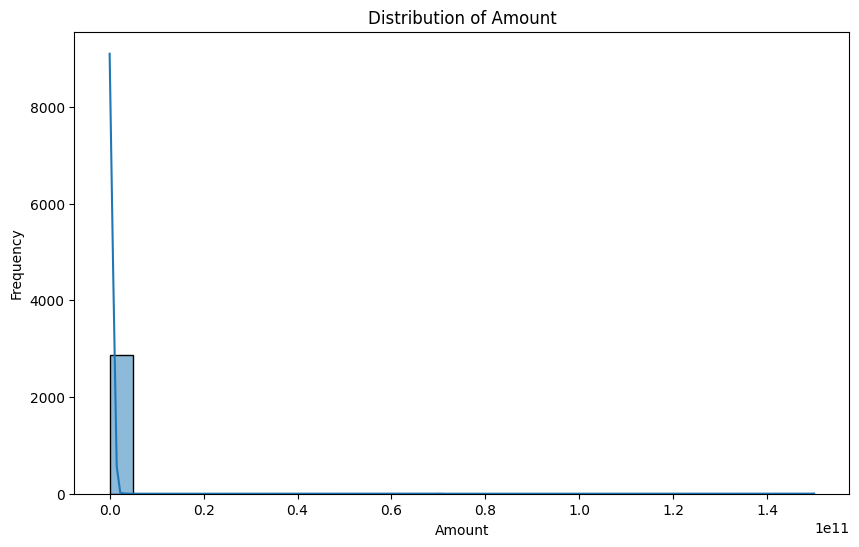

In [42]:
# Univariate Analysis
# Distribution of 'Amount'
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=30, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


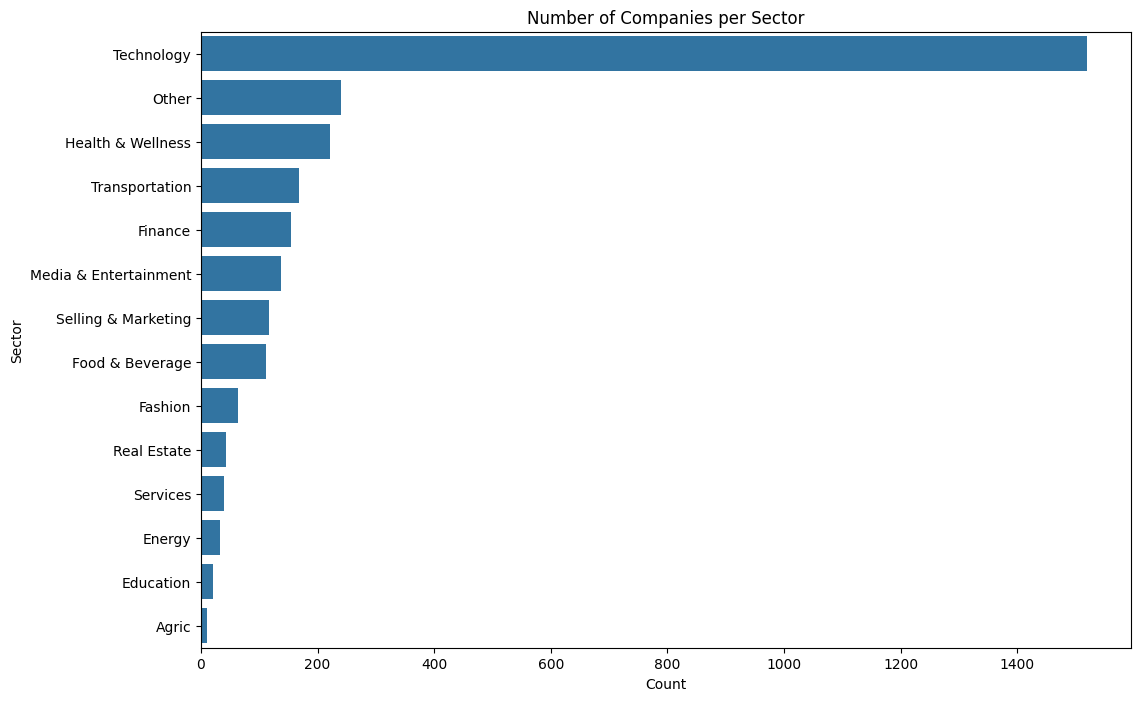

In [43]:
# Count of Companies per Sector
plt.figure(figsize=(12, 8))
sns.countplot(data=data, y='category', order=data['category'].value_counts().index)
plt.title('Number of Companies per Sector')
plt.xlabel('Count')
plt.ylabel('Sector')
plt.show()

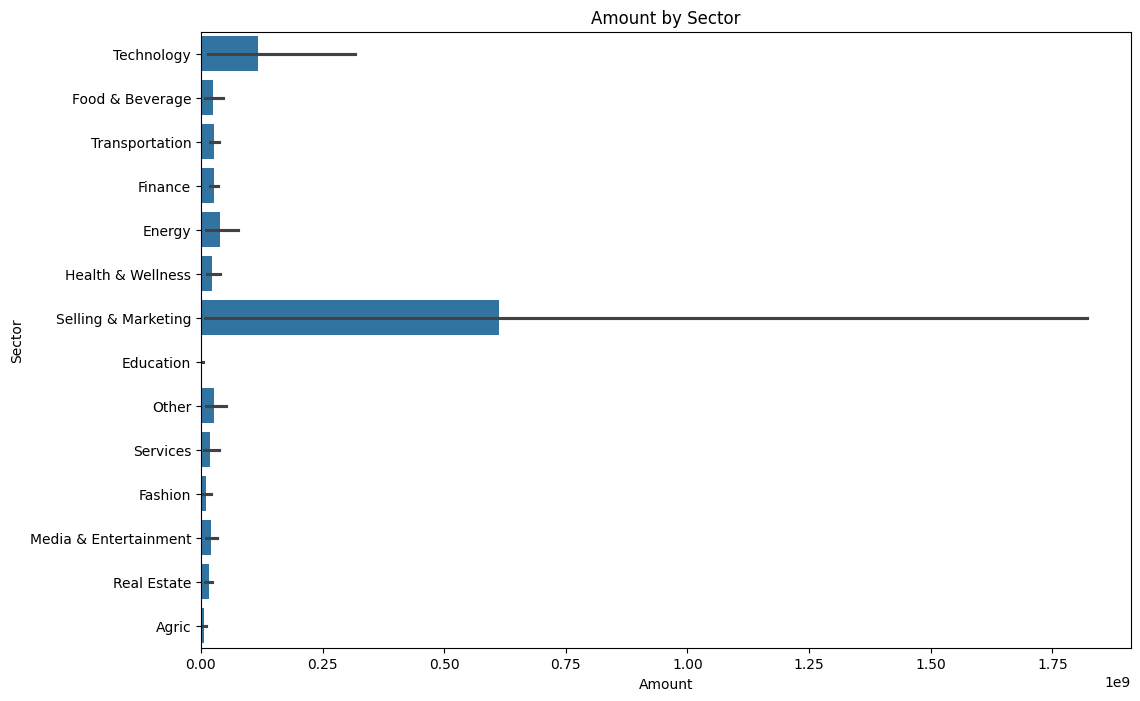

In [44]:
# Bivariate Analysis
# Amount by Sector
plt.figure(figsize=(12, 8))
sns.barplot(data=data, y='category', x='Amount')
plt.title('Amount by Sector')
plt.xlabel('Amount')
plt.ylabel('Sector')
plt.show()

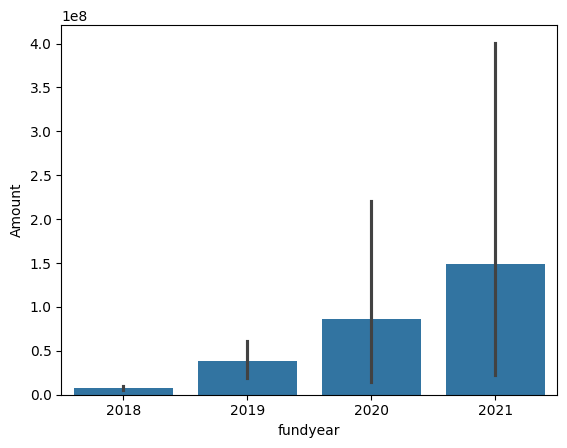

In [45]:
# Pairplot for selected numerical columns
sns.barplot(data = data, y='Amount', x='fundyear')
plt.show()

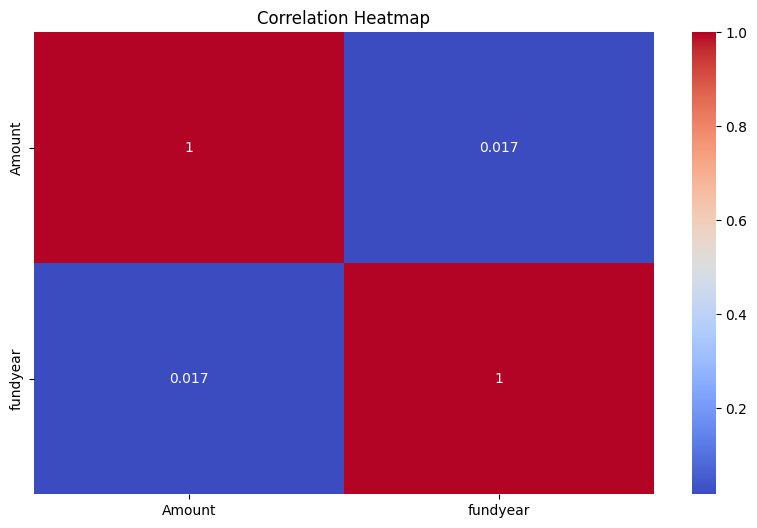

In [46]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data[['Amount', 'fundyear']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

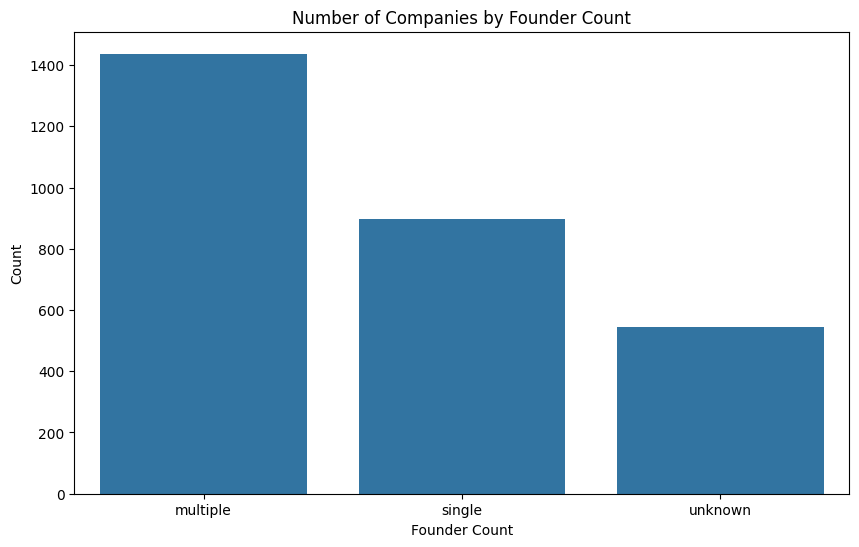

In [47]:
# Count of Companies by Founder Count
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='founder_count', order=data['founder_count'].value_counts().index)
plt.title('Number of Companies by Founder Count')
plt.xlabel('Founder Count')
plt.ylabel('Count')
plt.show()

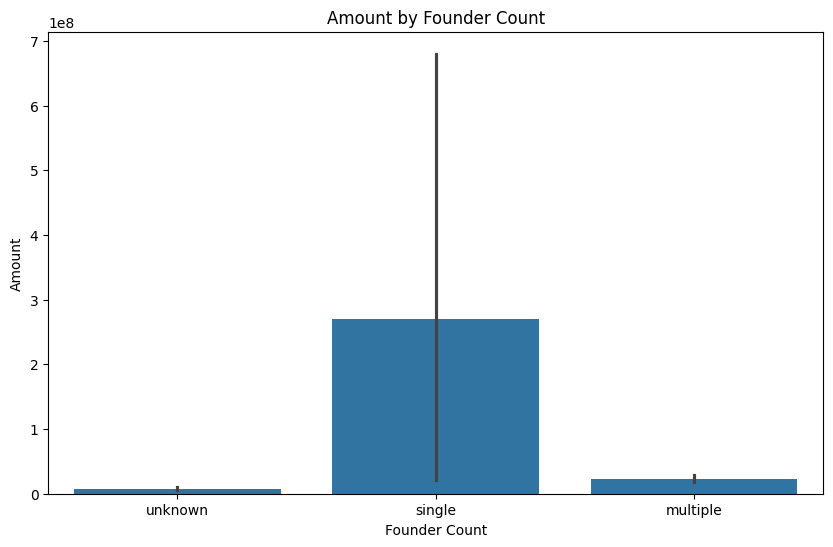

In [48]:
# Relationship between Founder Count and Amount
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='founder_count', y='Amount')
plt.title('Amount by Founder Count')
plt.xlabel('Founder Count')
plt.ylabel('Amount')
plt.show()


In [49]:
data['Amount'].describe(include='all')


count    2.879000e+03
mean     9.688238e+07
std      3.085502e+09
min      8.571400e+02
25%      1.000000e+06
50%      3.000000e+06
75%      7.500000e+06
max      1.500000e+11
Name: Amount, dtype: float64

## Hypothesis Testing


In [50]:

from scipy import stats

#Split the data into two groups based on 'founder_count'
single_founders = data[data['founder_count'] == 'single']['Amount']
multiple_founders = data[data['founder_count'] == 'multiple']['Amount']

#Perform a t-test to compare the means
t_stat, p_value = stats.ttest_ind(single_founders, multiple_founders)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

#Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is no significant difference in the amount raised by startups with single founders and multiple founders.")
else:
    print("Fail to reject the null hypothesis: There is a significant difference in the amount raised by startups with single founders and multiple founders.")


T-statistic: 1.6996557780474841
P-value: 0.08932905115851568
Fail to reject the null hypothesis: There is a significant difference in the amount raised by startups with single founders and multiple founders.


#### Conclusion : Because the p-value is greater than the alpha parameter we fail to reject the null hypothesis.

# Analytical Questions 

### Question 1: What is the average funding amount for startups based in different cities?

HeadQuarter
California    6.162600e+08
Mumbai        4.855118e+08
Shanghai      4.000000e+08
Beijing       2.000000e+08
Jiaxing       1.760000e+08
Berlin        1.700000e+08
San Ramon     1.500000e+08
Faridabad     8.419643e+07
London        4.806667e+07
Haryana       3.563488e+07
Name: Amount, dtype: float64


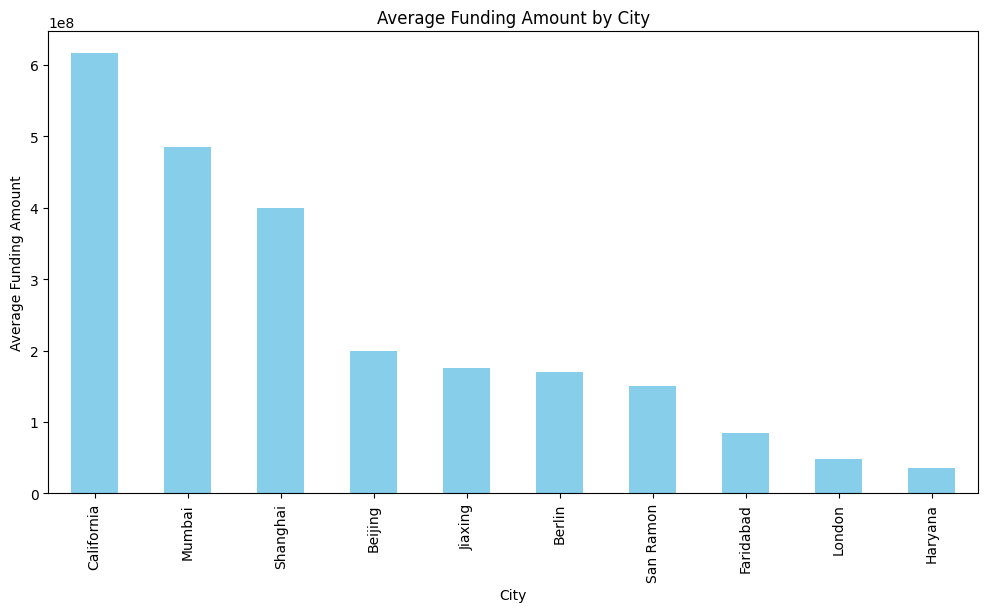

In [60]:

# Group by city and calculate average funding amount
average_funding_by_city = data.groupby('HeadQuarter')['Amount'].mean().sort_values(ascending=False)
average_funding_by_city_top10 = average_funding_by_city.head(10)

# Print the result
print(average_funding_by_city_top10)

# Plot the result
plt.figure(figsize=(12, 6))
average_funding_by_city_top10.plot(kind='bar', color='skyblue')
plt.title('Average Funding Amount by City')
plt.xlabel('City')
plt.ylabel('Average Funding Amount')
plt.xticks(rotation=90)
plt.show()


### Question 2: How does the total investment compare across different sectors? Which sectors have received the most and least funding?

category
Technology               1.776643e+11
Selling & Marketing      7.171593e+10
Other                    6.438888e+09
Health & Wellness        5.198109e+09
Transportation           4.675926e+09
Finance                  4.080206e+09
Media & Entertainment    2.888621e+09
Food & Beverage          2.738438e+09
Energy                   1.310174e+09
Services                 7.487424e+08
Real Estate              6.810038e+08
Fashion                  6.633494e+08
Agric                    6.785714e+07
Education                5.278886e+07
Name: Amount, dtype: float64


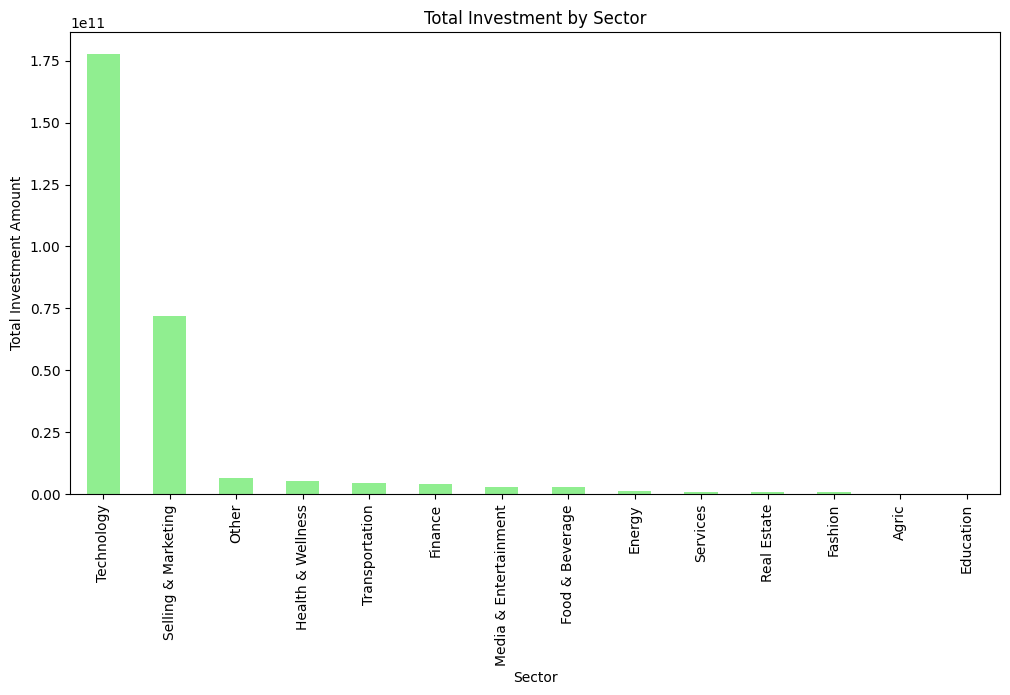

In [54]:
# Group by sector and calculate total investment
total_investment_by_sector = data.groupby('category')['Amount'].sum().sort_values(ascending=False)

# Print the result
print(total_investment_by_sector)

# Plot the result
plt.figure(figsize=(12, 6))
total_investment_by_sector.plot(kind='bar', color='lightgreen')
plt.title('Total Investment by Sector')
plt.xlabel('Sector')
plt.ylabel('Total Investment Amount')
plt.xticks(rotation=90)
plt.show()


### Question 3: What is the distribution of investment amounts across different stages of funding?

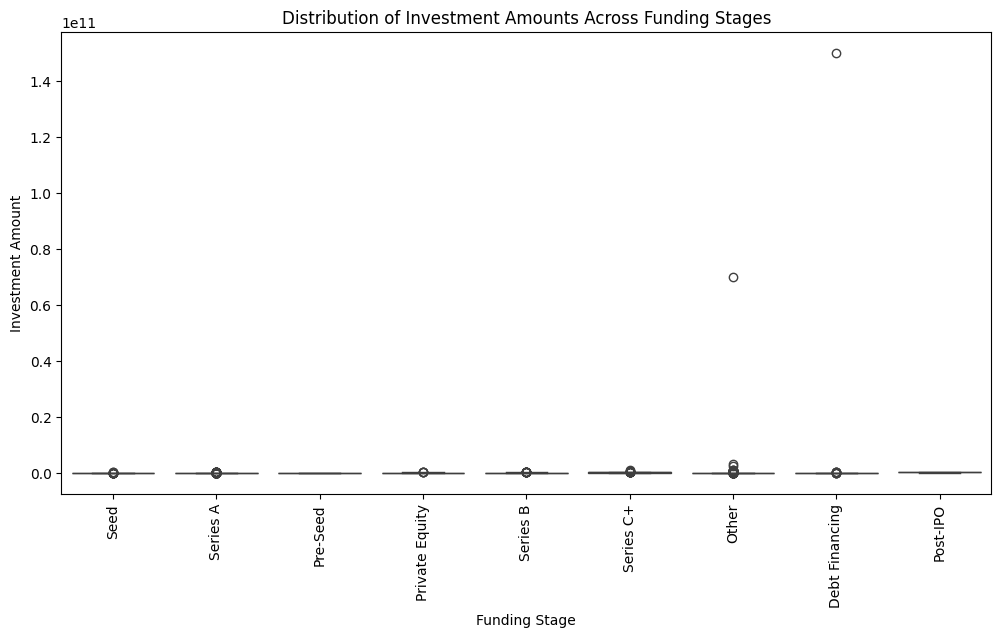

In [55]:
# Plot the distribution of investment amounts across funding stages
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Stage', y='Amount')
plt.title('Distribution of Investment Amounts Across Funding Stages')
plt.xlabel('Funding Stage')
plt.ylabel('Investment Amount')
plt.xticks(rotation=90)
plt.show()


### Question 4: How does the number of founders correlate with the stage of funding?

Stage          Debt Financing  Other  Post-IPO  Pre-Seed  Private Equity  \
founder_count                                                              
multiple                 36.0  496.0       0.0      47.0             1.0   
single                   17.0  449.0       0.0      20.0             0.0   
unknown                  16.0   48.0       3.0       7.0            21.0   

Stage           Seed  Series A  Series B  Series C+  
founder_count                                        
multiple       276.0     343.0      95.0      143.0  
single         135.0     181.0      41.0       54.0  
unknown        329.0      76.0      20.0       25.0  


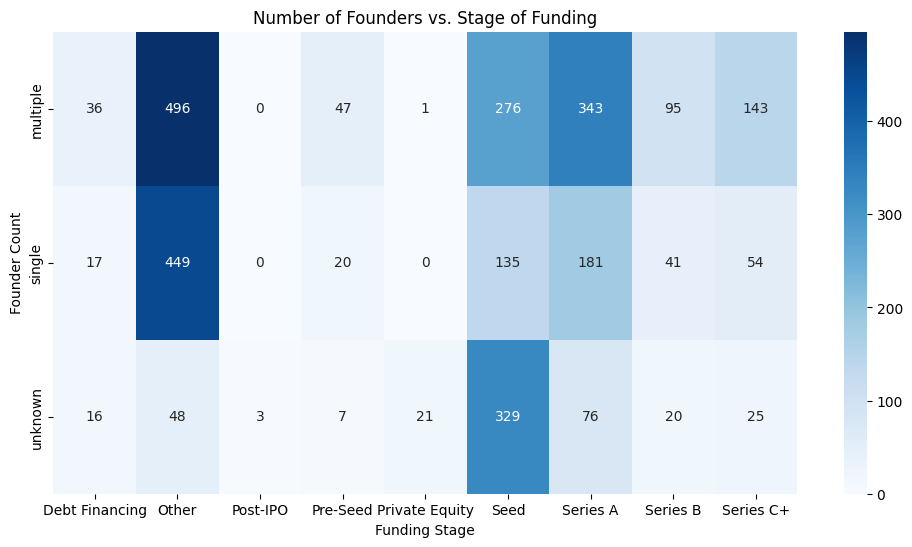

In [56]:
# Group by founder count and funding stage
founder_count_stage = data.groupby(['founder_count', 'Stage']).size().unstack().fillna(0)

# Print the result
print(founder_count_stage)

# Plot the result
plt.figure(figsize=(12, 6))
sns.heatmap(founder_count_stage, annot=True, fmt='.0f', cmap='Blues')
plt.title('Number of Founders vs. Stage of Funding')
plt.xlabel('Funding Stage')
plt.ylabel('Founder Count')
plt.show()


In [57]:
data.to_csv('Indian_Startup_Ecosystem_Finaldataset.csv')

# Observations Deductions and conlusions

## Observations
1.There has been significant investments over the four years with the investments, increasing every year with a total investment amount of about $279 billion over four years.

2.They have been a significant amount of startups within the four years with most of the Startup being technology Startup.

3.The sick is that have received significant finding over the years are technology, selling a marketing, as well as energy. 

4.There is a positive correlation between the amount, and the finder, which implies that the finding over the years have increased. 

5.They are more companies that have multiple founders compared to that of single founders.

5.Most of the startups have the headquarters in Bangalore, followed by Mumbai. However, this does not translate into the amount of finding received by Startup in Bangalore.


## Deductions

1.The Startup ecosystem in India is a very big one, considering the amount of funds that have been pumped into the ecosystem.

2.The amount of investments being made in the ecosystem, is most likely going to increase over the years.
 
3.Technology is on the rise in India, considering the number of technology Startup in India.

4.Even though a lot of startups, have their headquarters in India, the status with their headquarters outside of India tend to raise a lot of money for the start ups. This would imply it doesn’t cost lot for a start up with a headquarter in India.

## Conclusions

1.It is advisable to enter into the Indian Startup ecosystem due to the volume of fans being invested into the ecosystem

2.It would be advisable to create a startup in India, which has branches outside of India, because the analysis have proven that they are the type of startups that raise significantly more money.

3.Technology is on the rise in India, and investing into a technology startup maybe advisable.